## Import libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
import os
import shutil
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_path = '/content/drive/MyDrive/mashrooms-vision/train.csv'
images_folder = '/content/drive/MyDrive/mashrooms-vision/dataset/dataset'
output_folder = '/content/drive/MyDrive/mashrooms-vision/sorted/'

In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
os.makedirs(output_folder, exist_ok=True)

In [ ]:
for _, row in df.iterrows():
    image_name = str(row['Image']).zfill(5) + '.jpg'
    label = str(row['Mushroom'])

    src = os.path.join(images_folder, image_name)
    dst_folder = os.path.join(output_folder, label)
    dst = os.path.join(dst_folder, image_name)

    os.makedirs(dst_folder, exist_ok=True)

    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"not found: {src}")

In [ ]:
sorted_folder = "/content/drive/MyDrive/mashrooms-vision/sorted"

dirs = os.listdir(sorted_folder)

class_counts = []

for dir_name in dirs:
    class_folder = os.path.join(sorted_folder, dir_name)

    if os.path.isdir(class_folder):
        num_images = len(os.listdir(class_folder))
        class_counts.append((dir_name, num_images))
        print(f"Class {dir_name} has {num_images} images")

Class 0 has 238 images
Class 1 has 240 images
Class 2 has 240 images
Class 3 has 222 images
Class 4 has 227 images
Class 5 has 240 images
Class 6 has 238 images
Class 7 has 240 images
Class 8 has 240 images
Class 9 has 240 images


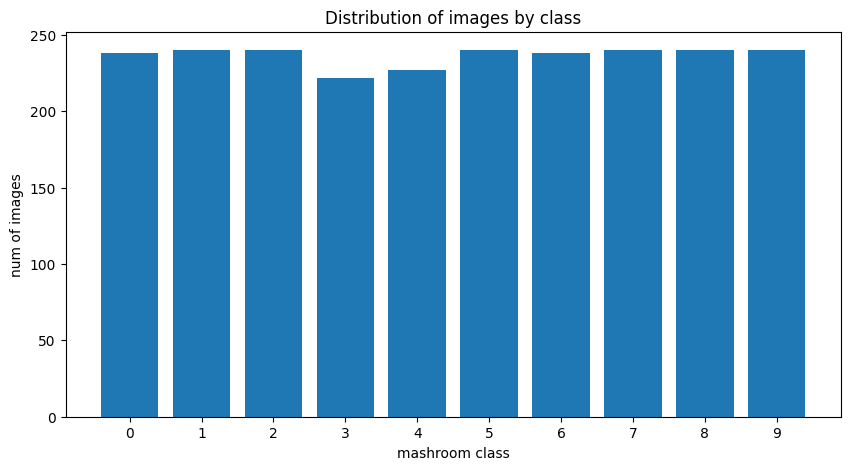

In [ ]:
classes, counts = zip(*class_counts)

plt.figure(figsize=(10,5))
plt.bar(classes, counts)
plt.xlabel("mashroom class")
plt.ylabel("num of images")
plt.title("Distribution of images by class")
plt.show()